# A simple LLT extension to LDVM to account for finite (large) aspect ratios

In [9]:
workspace()
include("../src/UNSflow.jl")
using UNSflow


    /(Real, ForwardDiff.GradientNumber) at /Users/kiran/.julia/v0.4/ForwardDiff/src/GradientNumber.jl:98
is ambiguous with: 
    /(Main.ForwardDiff.GradientNumber, Real) at /Users/kiran/.julia/v0.4/ForwardDiff/src/GradientNumber.jl:105.
To fix, define 
    /(Main.ForwardDiff.GradientNumber, ForwardDiff.GradientNumber)
before the new definition.
    /(Real, ForwardDiff.GradientNumber) at /Users/kiran/.julia/v0.4/ForwardDiff/src/GradientNumber.jl:98
is ambiguous with: 
    /(Main.ForwardDiff.HessianNumber, Real) at /Users/kiran/.julia/v0.4/ForwardDiff/src/HessianNumber.jl:147.
To fix, define 
    /(Main.ForwardDiff.HessianNumber, ForwardDiff.GradientNumber)
before the new definition.
    /(Real, ForwardDiff.GradientNumber) at /Users/kiran/.julia/v0.4/ForwardDiff/src/GradientNumber.jl:98
is ambiguous with: 
    /(Main.ForwardDiff.TensorNumber, Real) at /Users/kiran/.julia/v0.4/ForwardDiff/src/TensorNumber.jl:175.
To fix, define 
    /(Main.ForwardDiff.TensorNumber, ForwardDiff.GradientNum

In [10]:
#This repeoduces results from Case 3A in Ramesh et al. (2014)
alpha_mean = 4*pi/180.
alpha_amp = 22.5*pi/180.
k = 3.93
h_amp = 0.05
phi = 90*pi/180

w = 2*k #Frequency
T = (2*pi/w) #Period
t_tot = 2*T  #Desired total time
dt = 0.015*0.2*4/k #time step calculation


0.0030534351145038168

In [11]:
#CosDef arguments are mean, amplitude, k (red. freq.), phase (all in radians)
alphadef = CosDef(4*pi/180, 22.5*pi/180, 3.93, 90*pi/180)
hdef = CosDef(0., 0.05, 3.93, 0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.25

lespcrit = [0.21;]

pvt = 0.0 #leading edge

surf = TwoDSurf(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)


UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,"Prescribed",UNSflow.KinemDef(UNSflow.CosDef(0.06981317007977318,0.39269908169872414,3.93,1.5707963267948966),UNSflow.CosDef(0.0,0.05,3.93,0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.06981317007977321,0.05,-1.543307391075986,-0.0,1.0,0.0),[-1.0,-0.999483,-0.997933,-0.995354,-0.991751,-0.987131,-0.981504,-0.974881,-0.967277,-0.958706  …  -0.0437295,-0.0351591,-0.0275548,-0.0209321,-0.015305,-0.010685,-0.00708163,-0.00

In [12]:
curfield = TwoDFlowField()

nsteps =round(Int,t_tot/dt)+1


525

In [13]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dt)

(
525x9 Array{Float64,2}:
 0.00305344  0.0651009   0.0499964  1.0  …  -25.8406    230.128     -0.578564
 0.00610687  0.0603893   0.0499856  1.0      -0.410881    0.791245  -0.552148
 0.00916031  0.0556791   0.0499676  1.0      -0.555263    3.51063   -0.558934
 0.0122137   0.0509709   0.0499424  1.0      -0.640003    5.66169   -0.594695
 0.0152672   0.0462654   0.04991    1.0      -0.638519    6.30845   -0.637476
 0.0183206   0.0415633   0.0498705  1.0  …   -0.607831    6.43665   -0.680969
 0.021374    0.0368652   0.0498237  1.0      -0.560033    6.20227   -0.721927
 0.0244275   0.0321719   0.0497698  1.0      -0.508031    5.78564   -0.758429
 0.0274809   0.0274841   0.0497087  1.0      -0.460655    5.38231   -0.790553
 0.0305344   0.0228023   0.0496404  1.0      -0.419571    5.06369   -0.818968
 0.0335878   0.0181273   0.049565   1.0  …   -0.383815    4.85521   -0.844664
 0.0366412   0.0134597   0.0494825  1.0      -0.351383    4.74619   -0.868753
 0.0396947   0.00880029  0.0493928  1.

In [14]:
bnd_circ2d = mat[:,9]

525-element Array{Float64,1}:
 -0.578564
 -0.552148
 -0.558934
 -0.594695
 -0.637476
 -0.680969
 -0.721927
 -0.758429
 -0.790553
 -0.818968
 -0.844664
 -0.868753
 -0.892334
  ⋮       
 -1.63885 
 -1.63282 
 -1.62541 
 -1.61687 
 -1.60857 
 -1.60018 
 -1.59151 
 -1.58277 
 -1.5743  
 -1.5667  
 -1.55999 
 -1.55343 

In [16]:
n_step = length(bnd_circ2d)

525

In [17]:
c = 1

1

In [18]:
s = 4 #semispan

4

In [19]:
u = 1

1

In [20]:
ndiv = 20

20

In [29]:
lhs = zeros(ndiv,ndiv)
rhs = zeros(ndiv)
b_coeff = zeros(ndiv)
sp_gam = zeros(nsteps,ndiv)
for i = 1:nsteps
    for j = 1:ndiv
        psi = (real(j)/(ndiv+1))*pi
        for n = 1:ndiv
            lhs[j,n] = sin(n*psi)*(sin(psi) + (n*c*pi/(4*s)))
        end
        rhs[j] = c*pi*sin(psi)*bnd_circ2d[i]/(4*s)
    end
    b_coeff = \(lhs, rhs)
    for j = 1:ndiv
        psi = (real(j)/(ndiv+1))*pi      
        sp_gam[i,j] = 0
        for n = 1:ndiv
            sp_gam[i,j] = sp_gam[i,j] + 4*s*u*b_coeff[n]*sin(n*psi)
        end
    end
end
        

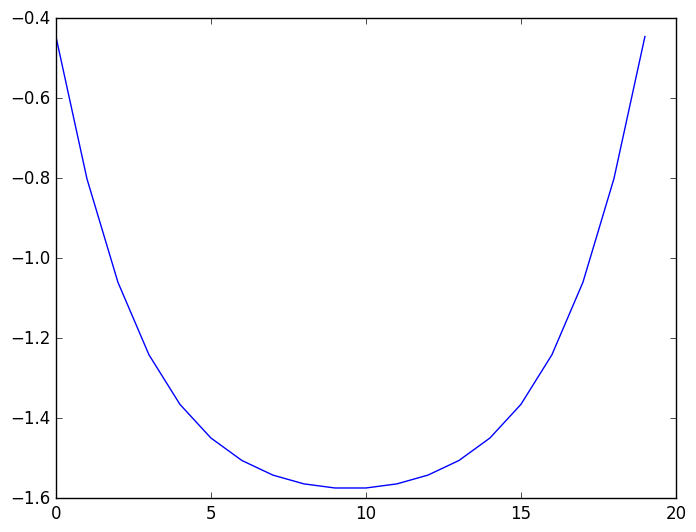

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32292c710>

In [46]:
plot(sp_gam[1,:]')

In [32]:
using PyPlot


In [47]:
bnd_circ2d[1]

-0.5785642020783345

### Corrected circulation distribution on the wing has been calculated. Now need expressions for forces and moments.